In [1]:
%load_ext autoreload
%autoreload 2

import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, Headings
import pyEPR as epr

In [2]:
design = designs.DesignPlanar({}, True)
design.chips.main.size['size_x'] = '2mm'
design.chips.main.size['size_y'] = '2mm'

gui = MetalGUI(design)

In [3]:
# Import the elements
from qiskit_metal.qlibrary.qubits.transmon_cross import TransmonCross
from qiskit_metal.qlibrary.qubits.transmon_cross_fl import TransmonCrossFL
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.couplers.coupled_line_tee import CoupledLineTee
from qiskit_metal.qlibrary.couplers.line_tee import LineTee
from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround
from qiskit_metal.qlibrary.terminations.short_to_ground import ShortToGround
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
from qiskit_metal.qlibrary.tlines.straight_path import RouteStraight
from qiskit_metal.qlibrary.tlines.framed_path import RouteFramed

In [4]:
design.delete_all_components()

In [5]:
xmon_options_1 = dict(chip='main', make_fl=False, cross_gap = '30um', cross_width = '30um', cross_length= '240um', 
    connection_pads=dict(
        dl1 = dict( connector_location = '0', connector_type = '1'),
#         b1 = dict(connector_location = '180', connector_type = '0', claw_length = '175um', claw_width = '7um', claw_gap= '6um', ground_spacing='4um'),
        #r1 = dict(connector_location = '90', connector_type = '0', claw_length = '210um', claw_width = '15um', claw_gap= '6um'), 
    
    ),
)

q1 = TransmonCrossFL(design, 'Q1', options=xmon_options_1)

otg1 = OpenToGround(design, 'otg1', options = dict(chip='main',
                                                   pos_x='-1mm',
                                                   pos_y='0mm', orientation='180'))
ops_dl = Dict(chip='main',
              pin_inputs=Dict(
                 start_pin=Dict(
                     component='Q1',
                     pin='dl1'),
                 end_pin=Dict(
                     component='otg1',
                     pin='open')))

d1 = RouteStraight(design, 'D1',  options=ops_dl)

In [6]:
gui.rebuild()
gui.autoscale()

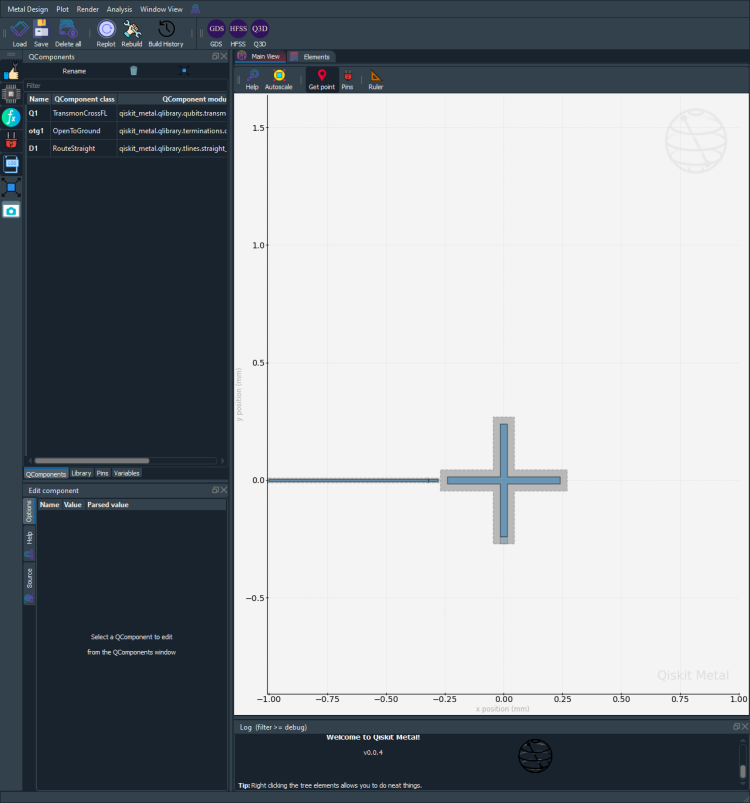

In [7]:
gui.screenshot()

In [8]:
design.chips

{'main': {'material': 'silicon',
  'layer_start': '0',
  'layer_end': '2048',
  'size': {'center_x': '0.0mm',
   'center_y': '0.0mm',
   'center_z': '0.0mm',
   'size_x': '2mm',
   'size_y': '2mm',
   'size_z': '-750um',
   'sample_holder_top': '890um',
   'sample_holder_bottom': '1650um'}}}

In [9]:
from qiskit_metal.analyses.simulation.scattering_impedance import ScatteringImpedanceSim
em1 = ScatteringImpedanceSim(design, "hfss")

In [10]:
hfss = em1.renderer

In [11]:
hfss.start()

INFO 03:11PM [connect_project]: Connecting to Ansys Desktop API...
INFO 03:11PM [load_ansys_project]: 	Opened Ansys App
INFO 03:11PM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 03:11PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    D:/Users/lfl/Documents/HFSS/
	Project:   QubitDriveLine
INFO 03:11PM [connect_design]: 	Opened active design
	Design:    QubitDriveLine [Solution type: DrivenModal]
INFO 03:11PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssDMSetup'>)
INFO 03:11PM [connect]: 	Connected to project "QubitDriveLine" and design "QubitDriveLine" 😀 



True

In [12]:
hfss.clean_active_design()

In [13]:
hfss.activate_ansys_design("QubitDriveLine", 'drivenmodal')

INFO 03:11PM [connect_design]: 	Opened active design
	Design:    QubitDriveLine [Solution type: DrivenModal]


In [14]:
hfss.options['x_buffer_width_mm'] = 0.5
hfss.options['y_buffer_width_mm'] = 0.5

In [15]:
hfss.render_design(selection=[],
                   open_pins=[],
                   port_list=[('D1', 'end', 50)],
                   jj_to_port=[],
                   ignored_jjs=[],
                   box_plus_buffer = False)

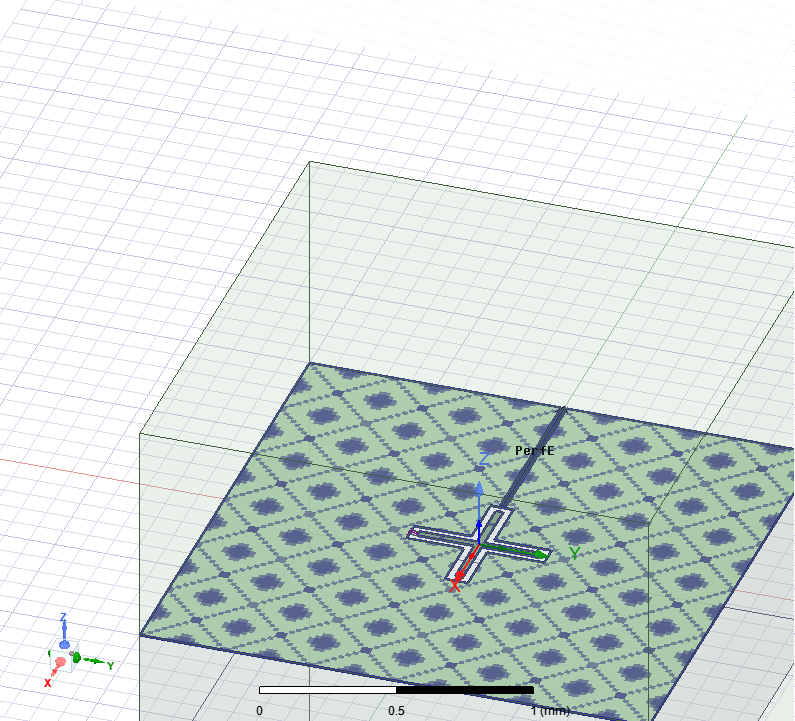

WindowsPath('D:/Users/lfl/Documents/lflPython/qiskit_metal/ansys.png')

In [16]:
hfss.save_screenshot()

In [19]:
%psource hfss.add_sweep

In [20]:
hfss.add_sweep(setup_name="Setup",
               name="Sweep",
               start_ghz=4.0,
               stop_ghz=4.3,
               step_ghz=0.00005,
               type="fast")

INFO 04:52PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssDMSetup'>)
ERROR 04:52PM [insert_sweep]: insert_sweep: Error type was not in  ['Fast', 'Interpolating', 'Discrete']
ERROR 04:52PM [insert_sweep]: ERROR: you should provide either step_ghz or count                     when inserting an HFSS driven model freq sweep.                     YOu either provided both or neither! See insert_sweep.


In [21]:
hfss.analyze_sweep('Sweep', 'Setup')

INFO 04:52PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssDMSetup'>)
INFO 04:52PM [analyze]: Analyzing setup Setup : Sweep


(                        S11
 4.00000  0.950979-0.309256j
 4.00005  0.950978-0.309259j
 4.00010  0.950977-0.309263j
 4.00015  0.950975-0.309267j
 4.00020  0.950974-0.309270j
 ...                     ...
 4.49980  0.938107-0.346344j
 4.49985  0.938106-0.346348j
 4.49990  0.938105-0.346352j
 4.49995  0.938103-0.346355j
 4.50000  0.938102-0.346359j
 
 [10001 rows x 1 columns],
 <Figure size 720x432 with 2 Axes>)

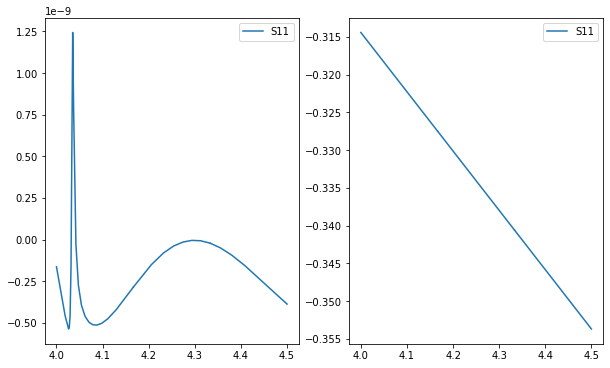

In [22]:
%matplotlib inline
hfss.plot_params(['S11'])

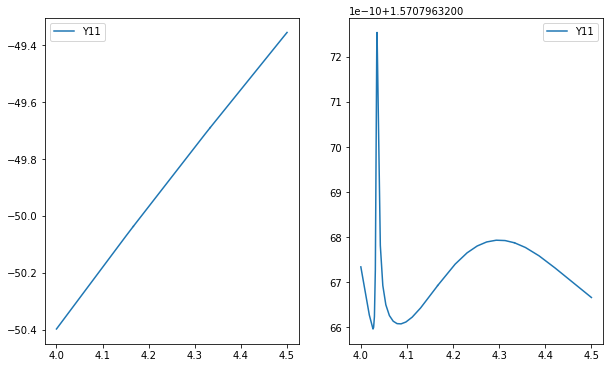

In [23]:
Y11, Y11_fig = hfss.plot_params(['Y11'])

In [ ]:
Z11 = hfss.plot_params(['Z11'])

In [24]:
Y11

,Y11
4.00000,0.000000+0.003021j
4.00005,0.000000+0.003021j
4.00010,0.000000+0.003021j
4.00015,0.000000+0.003021j
4.00020,0.000000+0.003021j
...,...
4.49980,0.000000+0.003406j
4.49985,0.000000+0.003406j
4.49990,0.000000+0.003406j
4.49995,0.000000+0.003406j
